In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Ядерная оценка плотности распределения

Ядерная оценка плотности распределения (KDE) — в некотором смысле алгоритм, доводящий идею смеси Гауссовых функций до логического предела: в нем
используется смесь, состоящая из одной Гауссовой компоненты для каждой точки,
что приводит к непараметрическому оценивателю плотности. 

Оцениватель плотности — алгоритм, предназначенный для моделирования распределения вероятностей, на основе которого был сгенерирован набор данных.

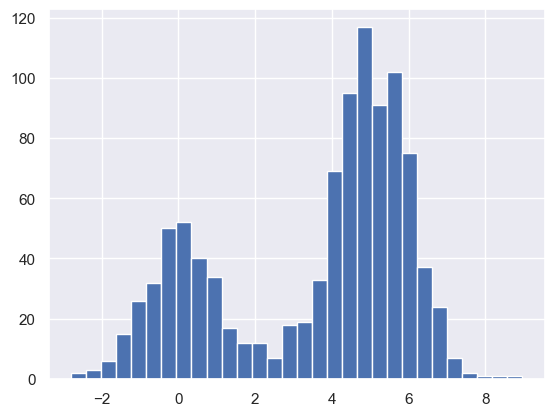

In [11]:
rand = np.random.RandomState(1)
x = rand.randn(1000)
x[int(0.3 * 1000):] += 5
plt.hist(x, bins=30)
plt.show()


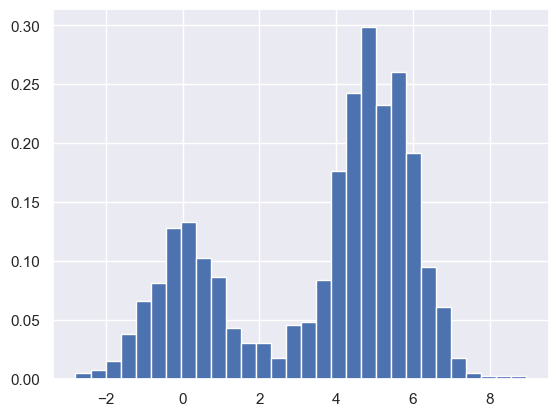

In [10]:
#  нормализованная гистограмма, в которой высота интервалов отражает плотность вероятности
plt.hist(x, bins=30, density=True)
plt.show()

Свободными параметрами ядерной оценки плотности распределения являются ядро
(kernel), определяющее форму распределения в каждой точке, и ширина ядра (kernel bandwidth), определяющая размер ядра в каждой точке. На практике для ядерной оценки плотности распределения существует множество различных ядер: в частности, реализация KDE библиотеки Scikit-Learn поддерживает использование одного из шести ядер.

In [12]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

KernelDensity()

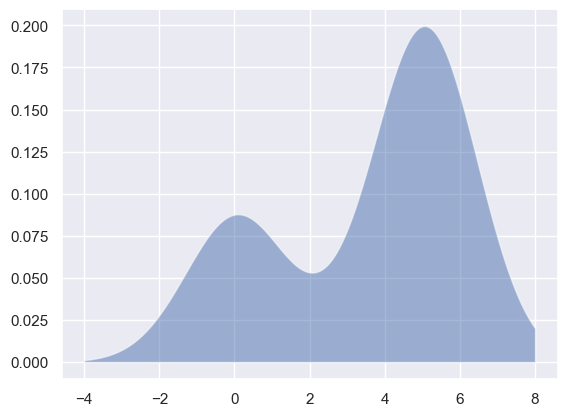

In [13]:
# логарифм плотности распределения вероятности
x_d = np.linspace(-4, 8, 1000)
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)

**Выбор ширины ядра путем перекрестной проверки**. Выбор ширины ядра в методе
KDE исключительно важен для получения удовлетворительной оценки плотности. Это и есть тот параметр, который при оценке плотности служит для выбора
компромисса между систематической ошибкой и дисперсией. Слишком маленькая
ширина ядра приводит к оценке с высокой дисперсией, то есть переобучению,
при которой наличие или отсутствие одной-единственной точки может серьезно
повлиять на модель. Слишком же широкое ядро ведет к оценке со значительной
систематической ошибкой, то есть недообучению, при которой структура данных
размывается этим широким ядром.

In [16]:
# воспользуемся поиском по сетке
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid.fit(x[:, None])

GridSearchCV(cv=LeaveOneOut(), estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.305385...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])})

In [18]:
# вариант ширины ядра, максимизирующий оценку эффективности модели 
# (которая в этом случае по умолчанию представляет собой логарифмическую функцию правдоподобия):
grid.best_params_

{'bandwidth': 0.35111917342151316}

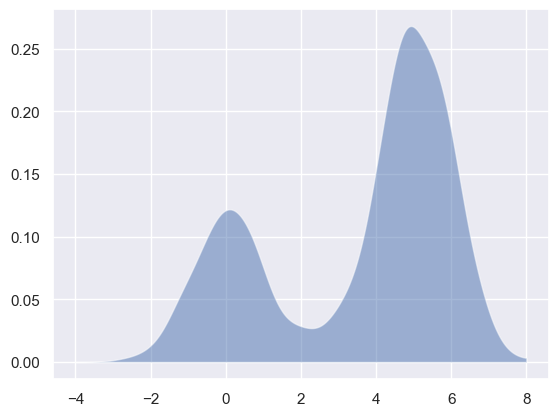

In [19]:
kde = KernelDensity(bandwidth=0.35111917342151316, kernel='gaussian')
kde.fit(x[:, None])
x_d = np.linspace(-4, 8, 1000)
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)